## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
print("Dataset loaded successfully. Displaying the first 5 rows:")
df.head()

Dataset loaded successfully. Displaying the first 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Initial Data Inspection

In [2]:
print("DataFrame Information:")
df.info()

print("\nDescriptive Statistics:")
df.describe()

print("\nMissing Values per Column:")
df.isnull().sum()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Descriptive Statistics:

Missing Values per Column:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Exploratory Data Analysis - Distributions

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical features, excluding 'Outcome'
numerical_features = df.columns.drop('Outcome')

print("Libraries imported successfully and numerical features identified.")

Libraries imported successfully and numerical features identified.


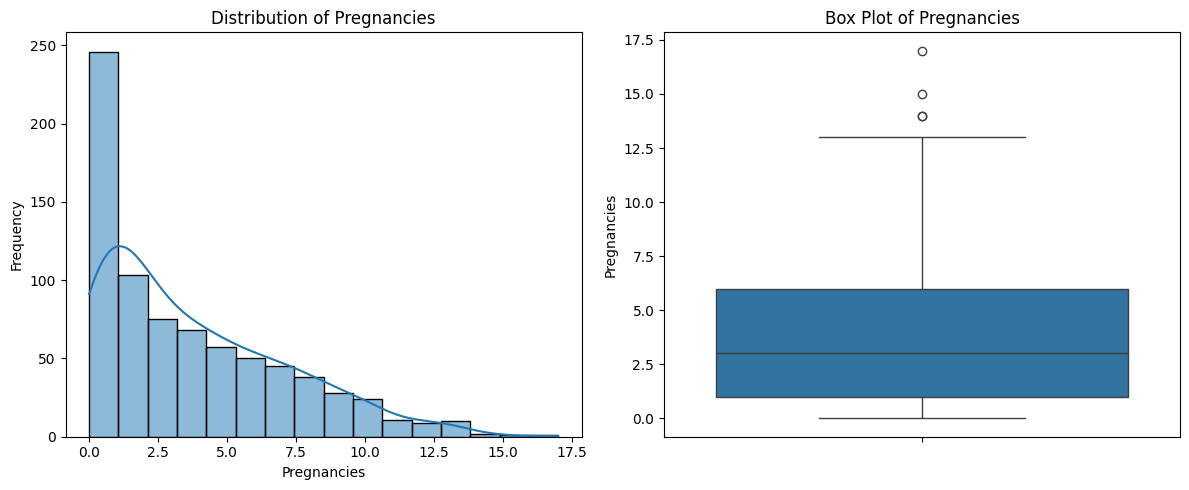

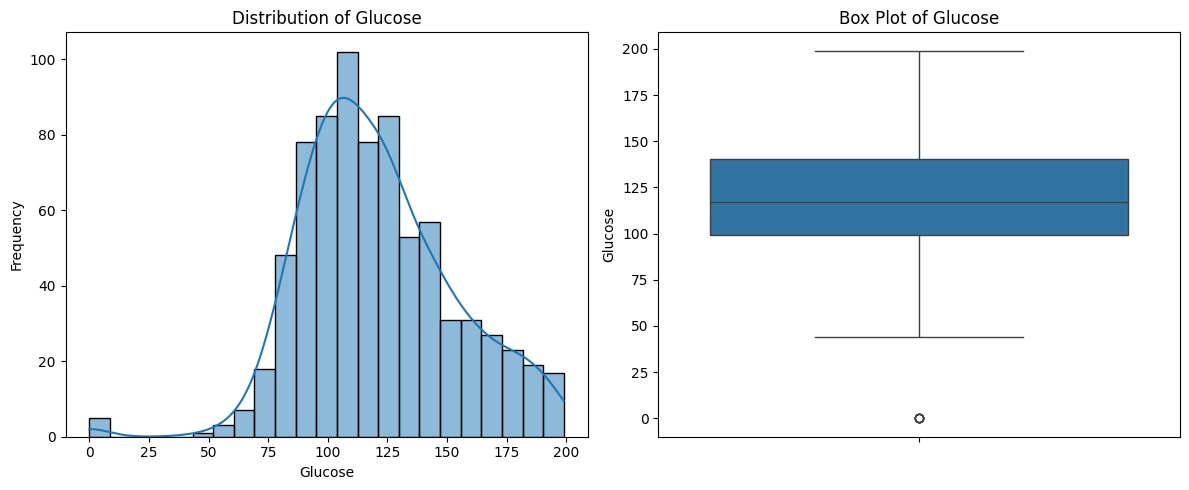

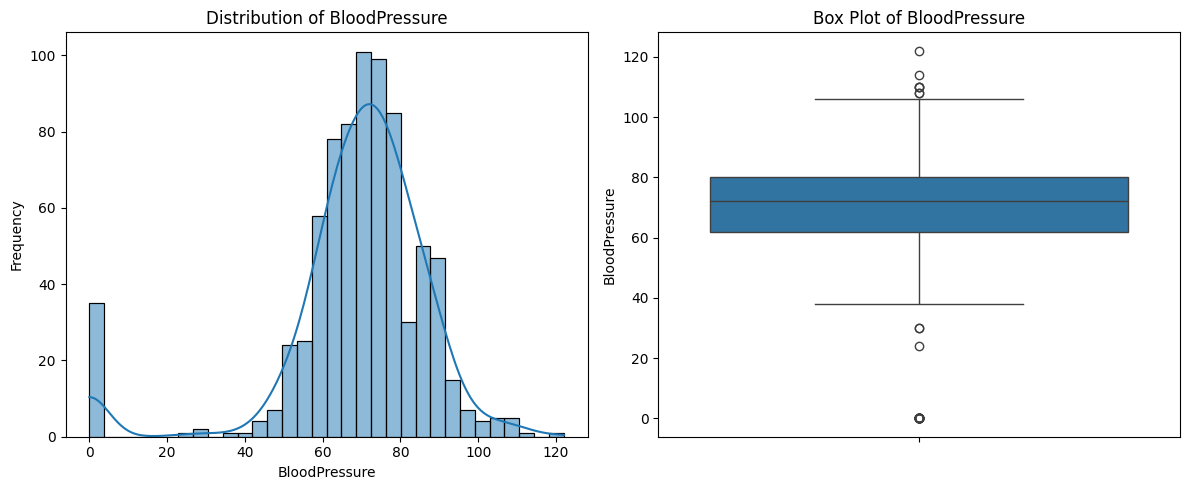

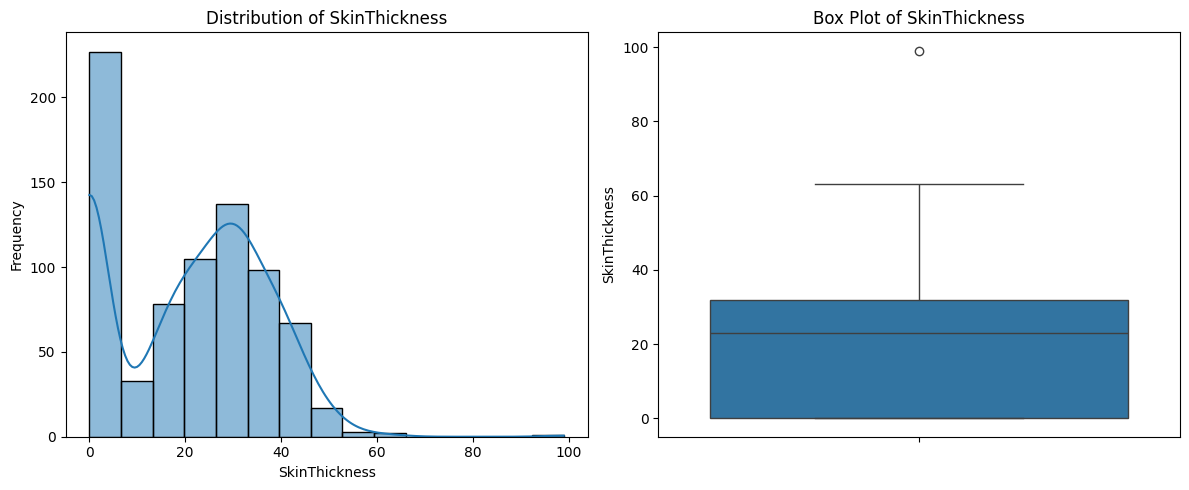

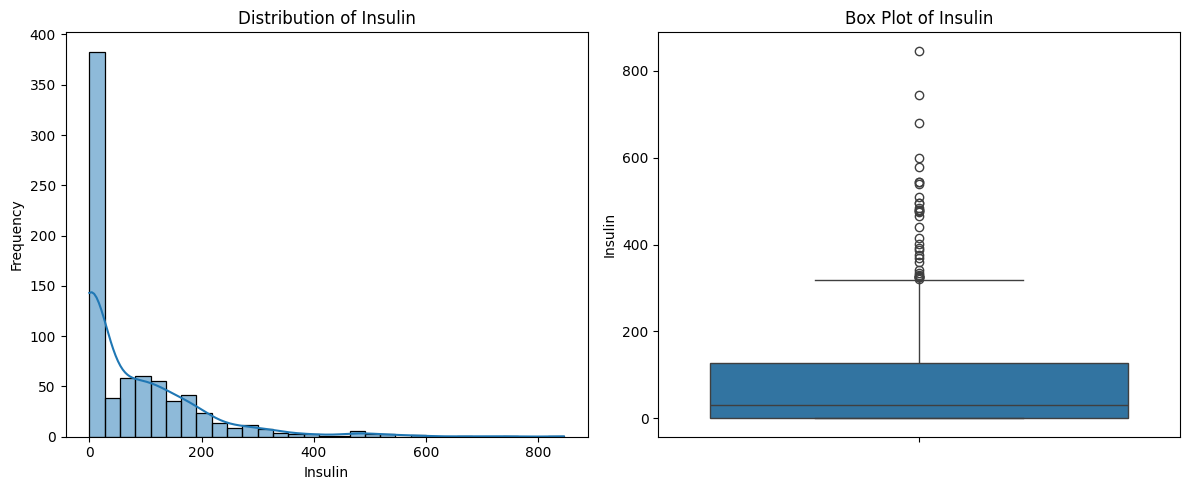

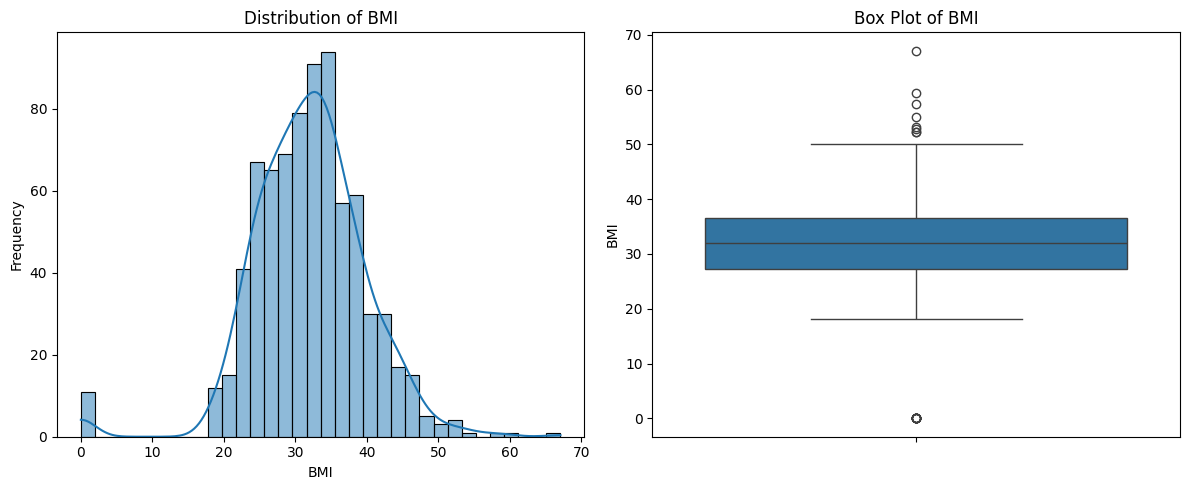

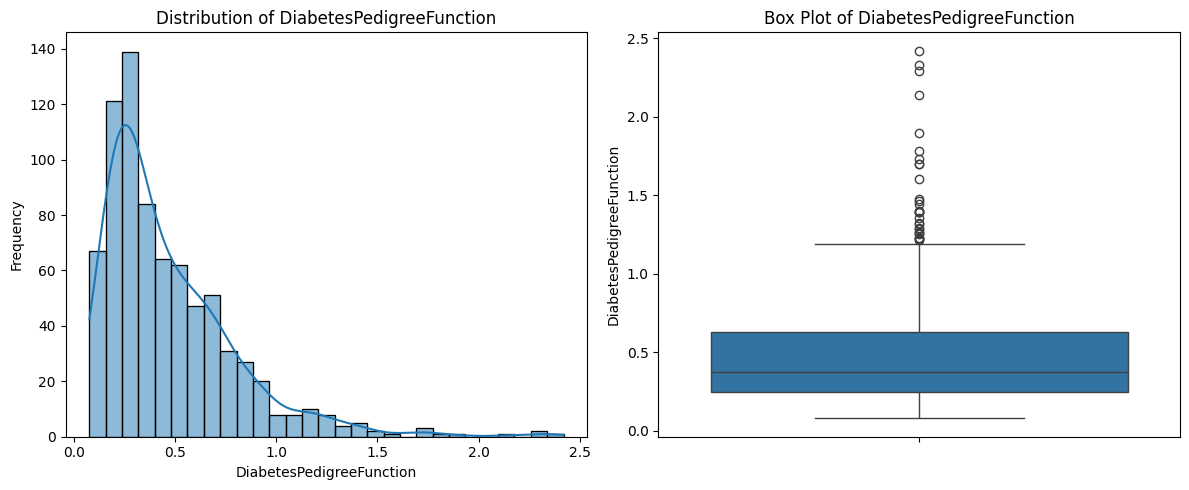

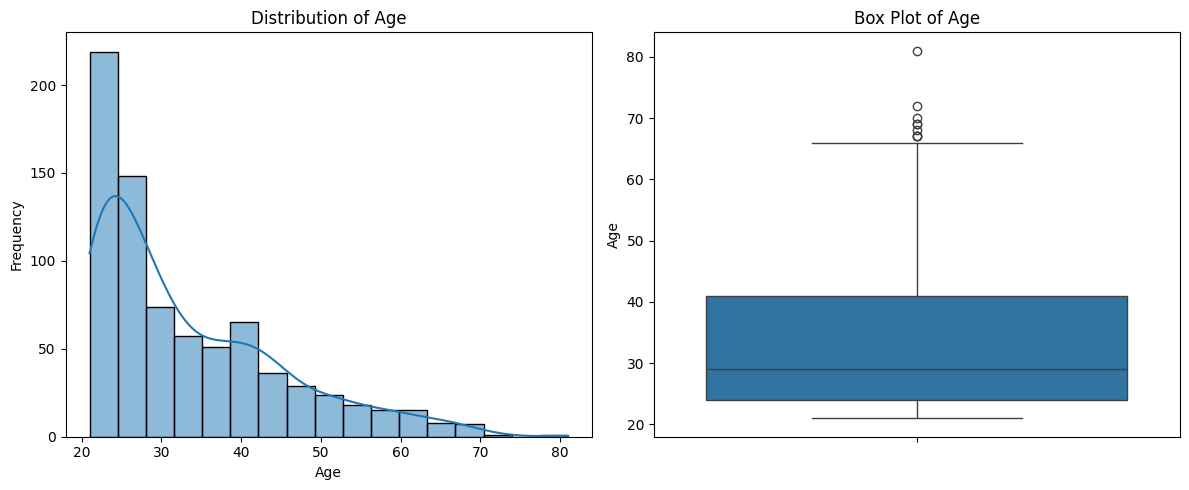

Histograms and box plots generated for all numerical features.


In [4]:
for feature in numerical_features:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

    plt.tight_layout()
    plt.show()

print("Histograms and box plots generated for all numerical features.")

## Exploratory Data Analysis - Relationships

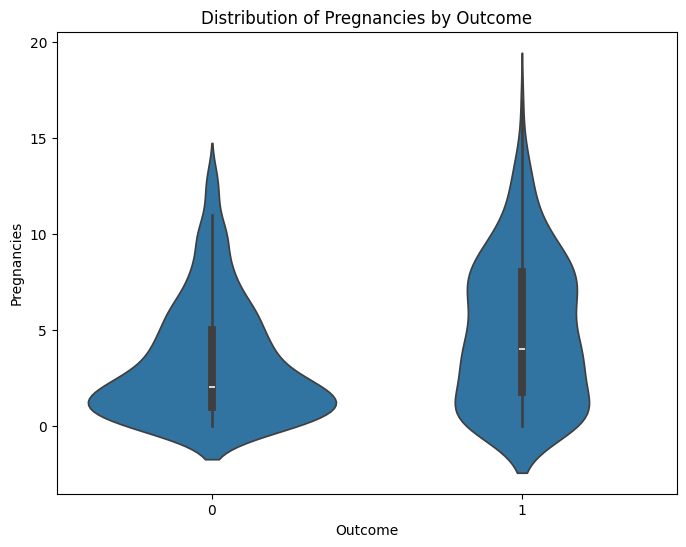

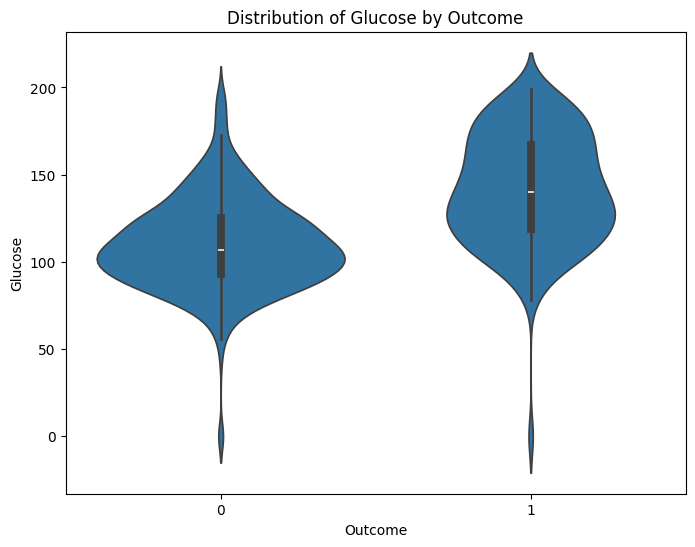

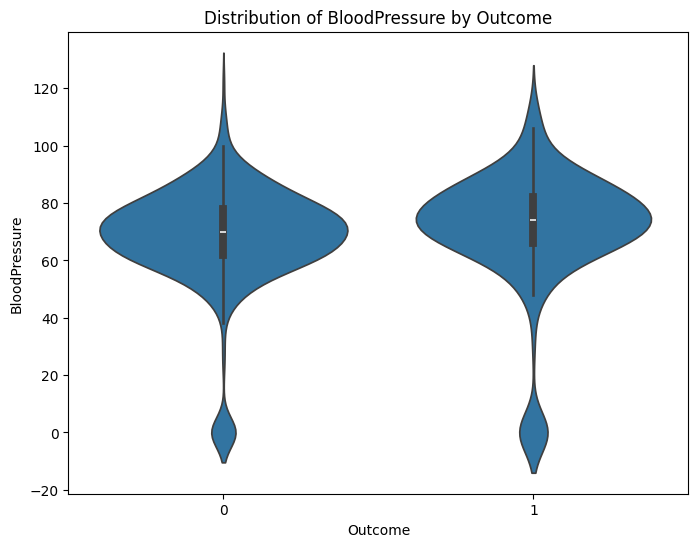

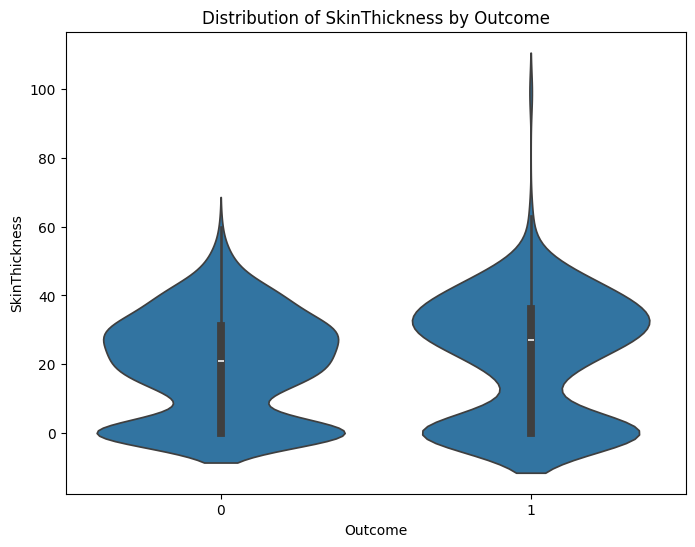

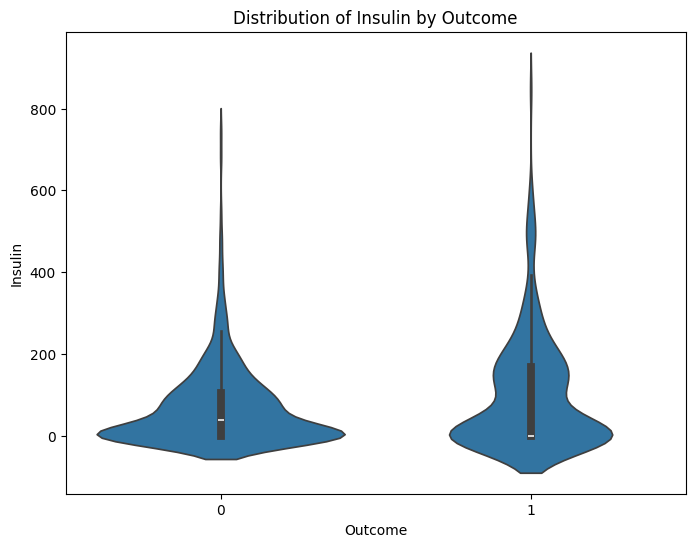

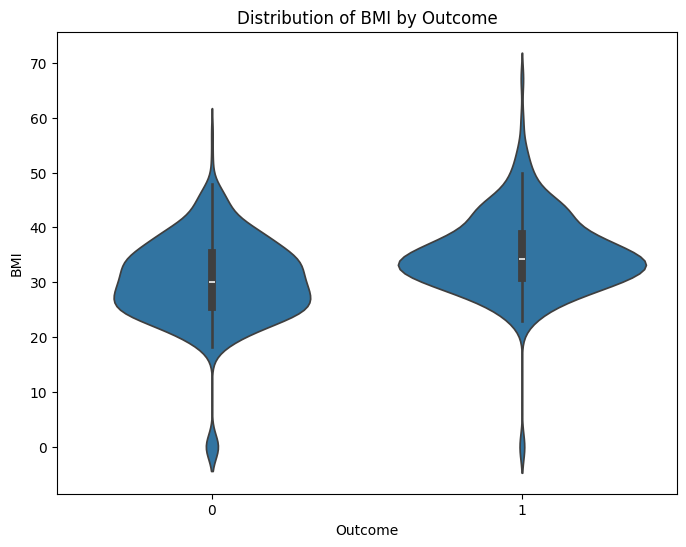

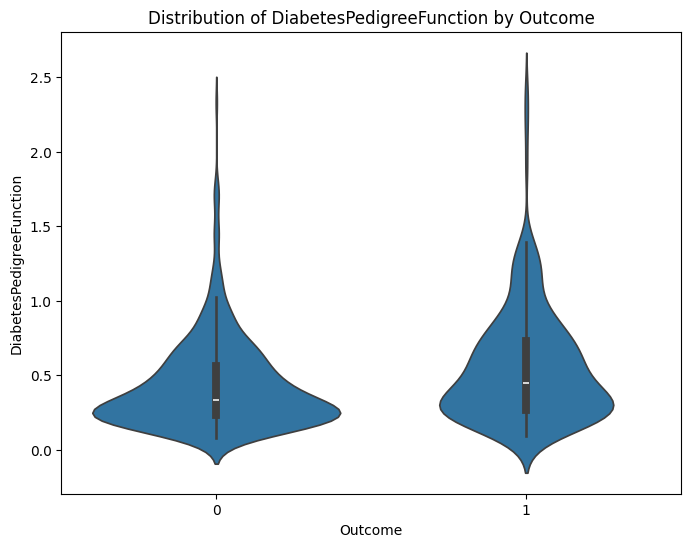

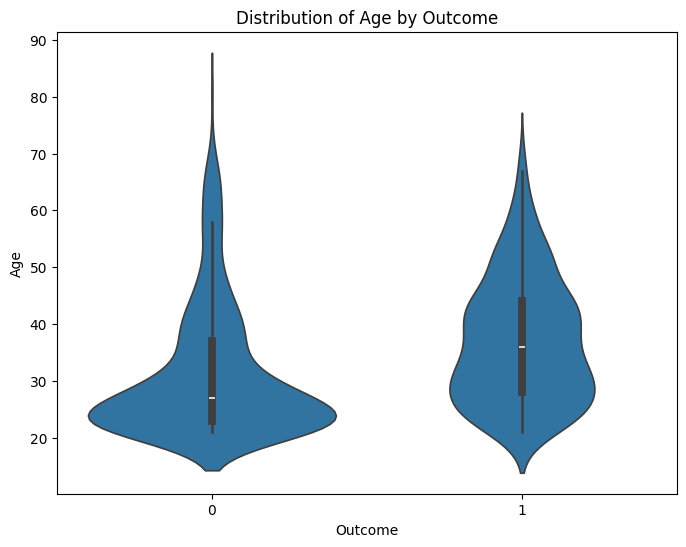

Violin plots generated for all numerical features against the Outcome variable.


In [5]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Outcome', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(feature)
    plt.show()

print("Violin plots generated for all numerical features against the Outcome variable.")

## Data Preprocessing - Missing Values

In [6]:
import numpy as np

print("NumPy imported successfully.")

NumPy imported successfully.


In [7]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 values with NaN in specified columns
for col in columns_to_impute:
    df[col] = df[col].replace(0, np.nan)

# Impute NaN values with the median of their respective columns
for col in columns_to_impute:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

print("Missing values (0s) in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' replaced with NaN and then imputed with their respective medians.")

print("\nUpdated Missing Values per Column (should all be 0 now for imputed columns):")
print(df[columns_to_impute].isnull().sum())


Missing values (0s) in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI' replaced with NaN and then imputed with their respective medians.

Updated Missing Values per Column (should all be 0 now for imputed columns):
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


## Data Preprocessing - Feature Engineering/Encoding

## Define Target and Features

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("First 5 rows of features (X):")
print(X.head())

print("\nFirst 5 rows of target variable (y):")
print(y.head())

First 5 rows of features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

First 5 rows of target variable (y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


## Split Data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shapes of training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of training and testing sets:
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


## Model Training - LightGBM


In [10]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [5, 7, -1],
    'min_child_samples': [20, 30],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

# Instantiate the LGBMClassifier model
lgbm = lgb.LGBMClassifier(random_state=42, objective='binary')

# Initialize GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_lgbm.fit(X_train, y_train)

# Store the best estimator
best_lgbm_model = grid_search_lgbm.best_estimator_

print("Best hyperparameters found for LightGBM:")
print(grid_search_lgbm.best_params_)
print("Best ROC-AUC score for LightGBM:")
print(grid_search_lgbm.best_score_)
print("LightGBM model training and hyperparameter tuning completed.")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## Model Evaluation - LightGBM


LightGBM Model Evaluation:
Accuracy: 0.7662
Precision: 0.7021
Recall: 0.6000
F1-Score: 0.6471
ROC AUC Score: 0.8222


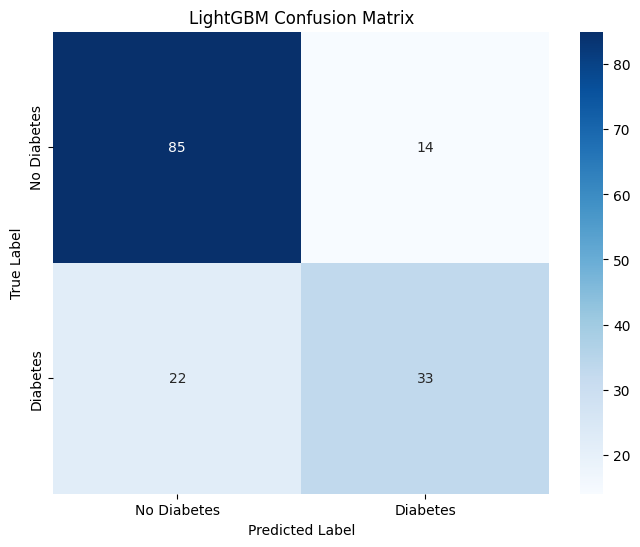

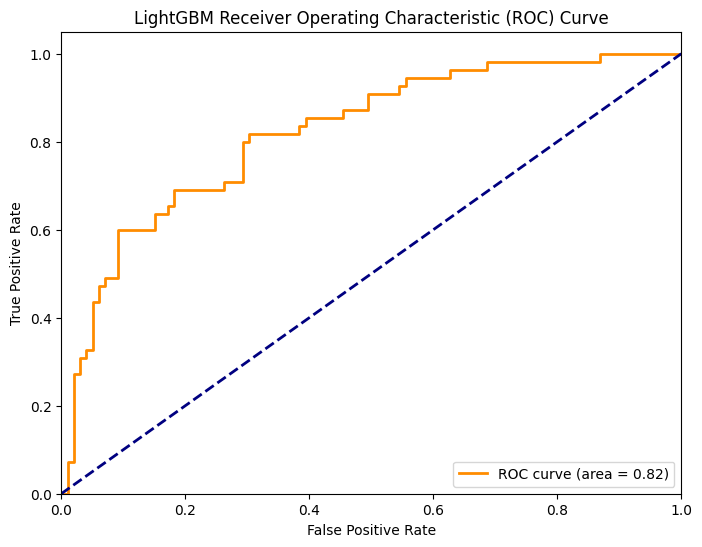

LightGBM model evaluation complete.


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred_lgbm = best_lgbm_model.predict(X_test)
y_proba_lgbm = best_lgbm_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Calculate and print classification metrics
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm)
recall_lgbm = recall_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)

print("LightGBM Model Evaluation:")
print(f"Accuracy: {accuracy_lgbm:.4f}")
print(f"Precision: {precision_lgbm:.4f}")
print(f"Recall: {recall_lgbm:.4f}")
print(f"F1-Score: {f1_lgbm:.4f}")
print(f"ROC AUC Score: {roc_auc_lgbm:.4f}")

# Generate and display confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_proba_lgbm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("LightGBM model evaluation complete.")

## Model Training - XGBoost

In [12]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

# Instantiate the XGBClassifier model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

# Store the best estimator
best_xgb_model = grid_search_xgb.best_estimator_

print("Best hyperparameters found for XGBoost:")
print(grid_search_xgb.best_params_)
print("Best ROC-AUC score for XGBoost:")
print(grid_search_xgb.best_score_)
print("XGBoost model training and hyperparameter tuning completed.")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters found for XGBoost:
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best ROC-AUC score for XGBoost:
0.8499862256128405
XGBoost model training and hyperparameter tuning completed.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:37:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Model Evaluation:
Accuracy: 0.7338
Precision: 0.6207
Recall: 0.6545
F1-Score: 0.6372
ROC AUC Score: 0.8299


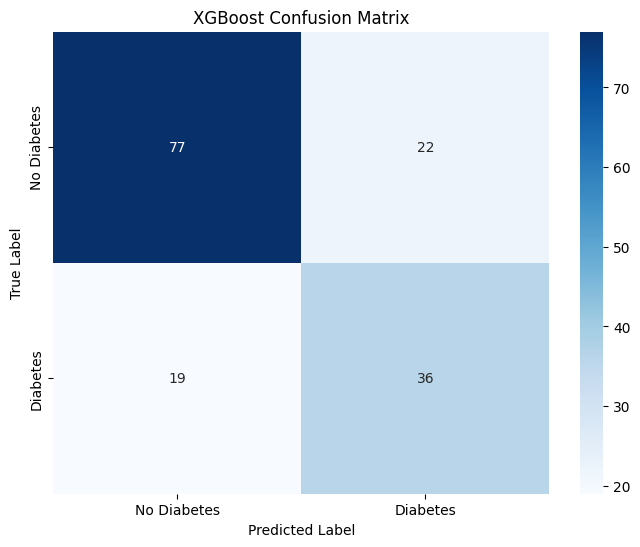

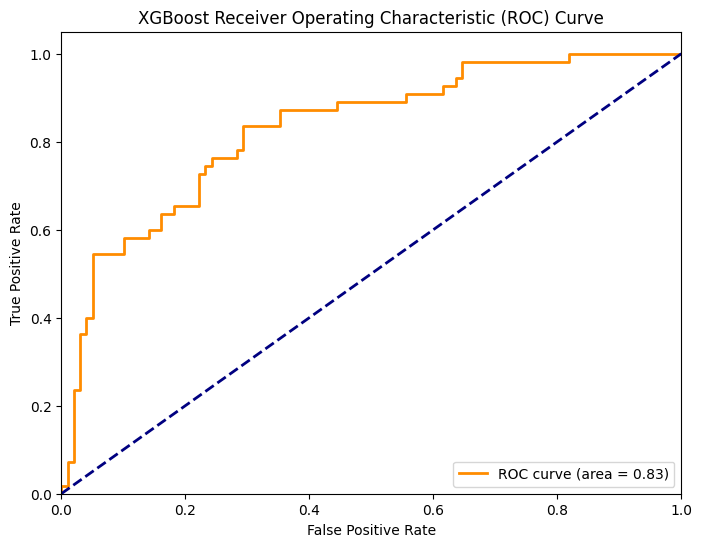

XGBoost model evaluation complete.


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1] # Probability of the positive class

# Calculate and print classification metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")

# Generate and display confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("XGBoost model evaluation complete.")

In [14]:
import pandas as pd

# Create a dictionary to store the evaluation metrics for both models
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'],
    'LightGBM': [
        accuracy_lgbm,
        precision_lgbm,
        recall_lgbm,
        f1_lgbm,
        roc_auc_lgbm
    ],
    'XGBoost': [
        accuracy_xgb,
        precision_xgb,
        recall_xgb,
        f1_xgb,
        roc_auc_xgb
    ]
}

# Create a DataFrame to display the comparison
comparison_df = pd.DataFrame(metrics_data)

print("Model Performance Comparison:")
print(comparison_df.round(4))


Model Performance Comparison:
      Metric  LightGBM  XGBoost
0   Accuracy    0.7662   0.7338
1  Precision    0.7021   0.6207
2     Recall    0.6000   0.6545
3   F1-Score    0.6471   0.6372
4    ROC AUC    0.8222   0.8299


## Comparative Analysis - Visualization

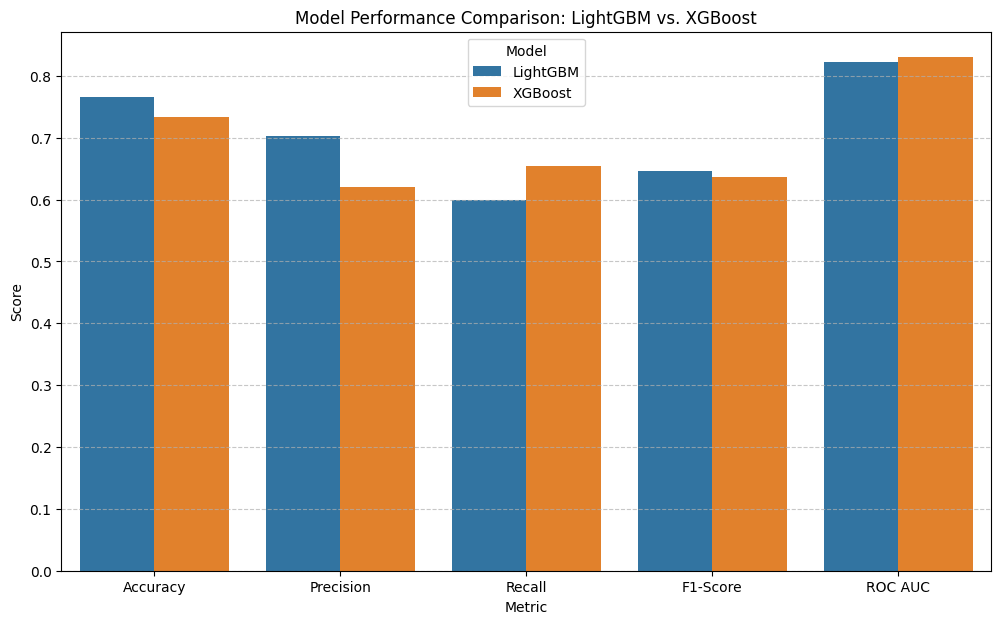

Comparative performance visualization generated successfully.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for easier plotting with seaborn
metrics_melted = comparison_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted)
plt.title('Model Performance Comparison: LightGBM vs. XGBoost')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Comparative performance visualization generated successfully.")

## Summary:

The comparative analysis of LightGBM and XGBoost models for diabetes prediction reveals distinct strengths and weaknesses, with practical implications depending on the prioritization of diagnostic errors:

*   **LightGBM:**
    *   **Strengths:** Demonstrates higher overall accuracy (0.7662), precision (0.7021), and a slightly better F1-score (0.6471). This means LightGBM is generally more accurate in its predictions and produces fewer false positives (i.e., it is more reliable when it predicts a positive case).
    *   **Weaknesses:** Exhibits lower recall (0.6000) compared to XGBoost, indicating it may miss more actual diabetes cases.
*   **XGBoost:**
    *   **Strengths:** Achieves a higher recall (0.6545) and a slightly better ROC AUC score (0.8299). Higher recall is crucial in medical diagnosis as it minimizes false negatives, ensuring that more individuals with diabetes are correctly identified.
    *   **Weaknesses:** Shows lower accuracy (0.7338), precision (0.6207), and F1-score (0.6372) compared to LightGBM, suggesting it might generate more false positive diagnoses.
*   **Practical Implications:** For diabetes diagnosis, minimizing false negatives (maximizing recall) is often paramount to ensure timely intervention and treatment. In this context, **XGBoost's superior recall (0.6545)** makes it potentially more suitable, as missing a diabetes case could have more severe health consequences than a false positive, which can be further investigated with additional tests. If the cost of false positives (e.g., unnecessary follow-up tests, patient anxiety) were deemed extremely high, LightGBM's higher precision might be preferred, but typically recall is prioritized for critical diagnoses.
